## TASK 1 - Understand the problem statement.

- The objective of this case study is to predict the employee salary based on the number of years of experience. 
- In simple linear regression, we predict the value of one variable Y based on another variable X.
- X is called the independent variable and Y is called the dependant variable.
- Why simple? Because it examines relationship between two variables only.
- Why linear? when the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.


## TASK 2 - Import libraries and datasets.

In [1]:
!pip install tensorflow seaborn

In [2]:
!pip install --upgrade pip

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2023-10-19 18:29:58.307827: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 18:29:58.357666: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-19 18:29:58.357705: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-19 18:29:58.357733: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-19 18:29:58.366255: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 18:29:58.367220: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [4]:
# read source csv file
salary_df = pd.read_csv('salary.csv')
print(salary_df.shape)
salary_df.head()

(35, 2)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
salary_df.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [6]:
print(salary_df['Salary'].min())
print('\n')
print(salary_df['Salary'].max())

37731


139465


### TASK #3: Perform exploratory data analysis and visualization

<AxesSubplot:>

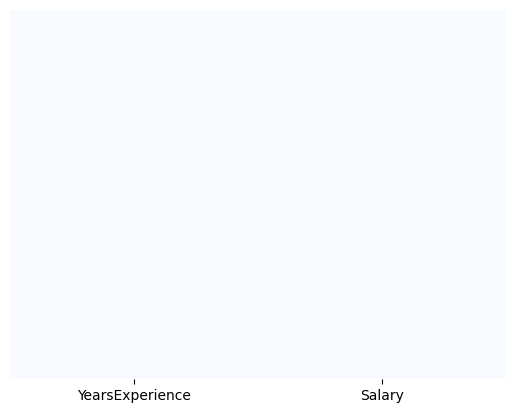

In [7]:
# Check if there are any Null Values
sns.heatmap(salary_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [8]:
# Check the dataframe info
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [9]:
# Statistical summary of the dataframe
salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


MINI CHALLENGE
 - What are the number of years of experience corresponding to employees with minimum and maximim salaries?

In [10]:
print(f'Employees with minimum salaries:\n{salary_df.min()}')
print('\n')
print(f'Employees with maximum salaries:\n{salary_df.max()}')

Employees with minimum salaries:
YearsExperience        1.1
Salary             37731.0
dtype: float64


Employees with maximum salaries:
YearsExperience        13.5
Salary             139465.0
dtype: float64


In [11]:
# Employee w/maximum salary
max = salary_df[salary_df['Salary']==salary_df['Salary'].max()]
max

,YearsExperience,Salary
34,13.5,139465


In [13]:
# Employee v/minimum salary
min = salary_df[salary_df['Salary']==salary_df['Salary'].min()]
min

,YearsExperience,Salary
2,1.5,37731


array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

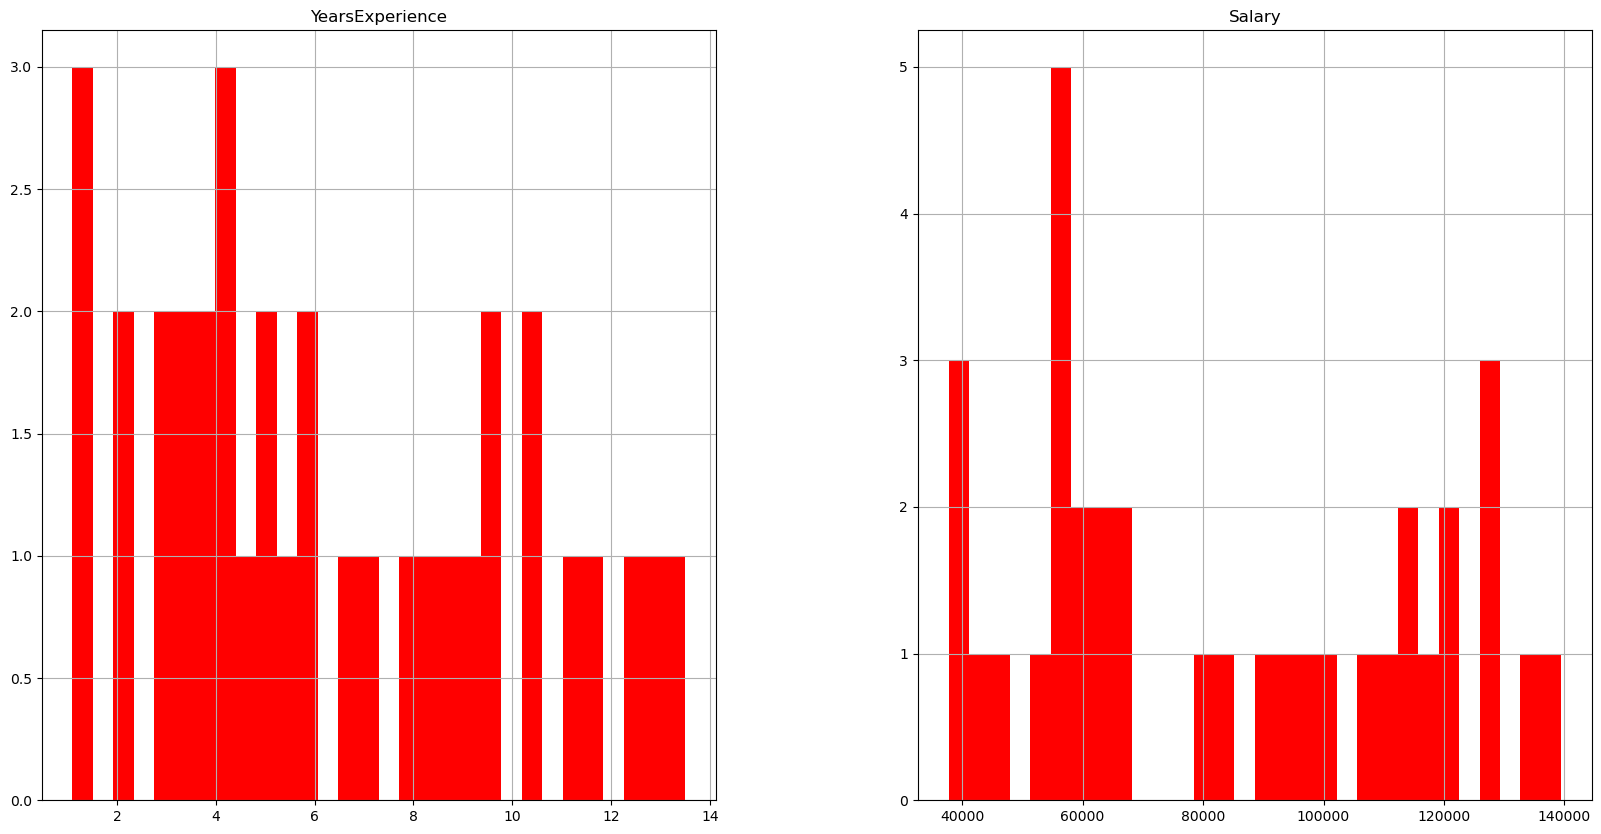

In [14]:
salary_df.hist(bins = 30, figsize = (20,10), color = 'r')

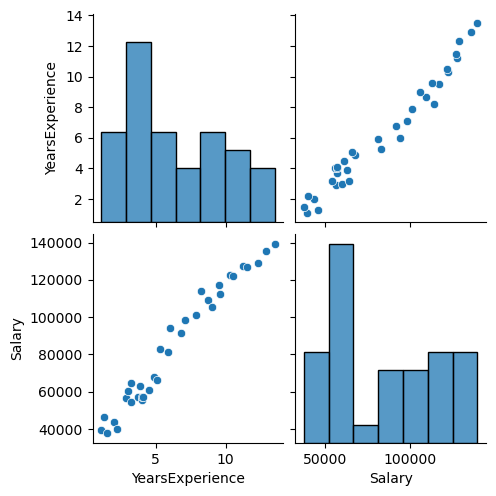

In [15]:
# Plot pairplot
sns.pairplot(salary_df)

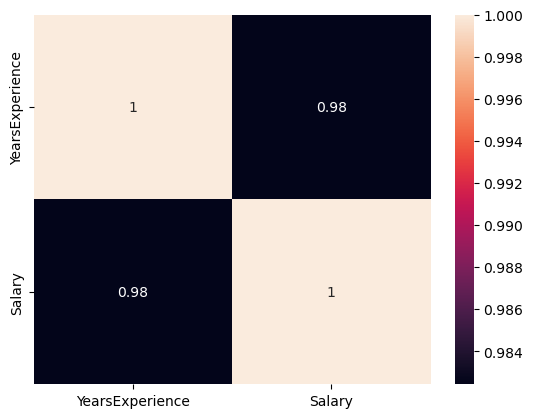

In [16]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

MINI CHALLENGE
- Use regplot in Seaborn to obtain a straight line fit between "salary" and "years of experience"

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

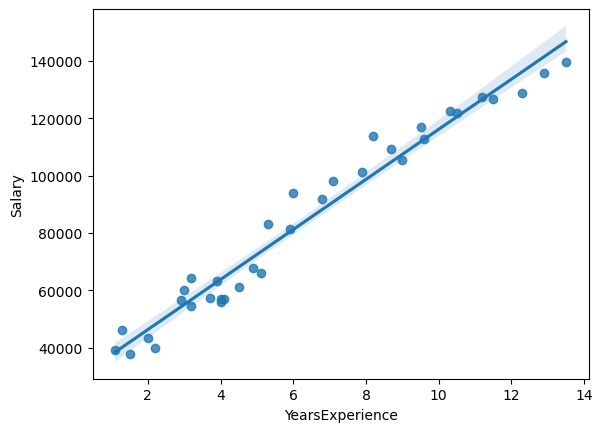

In [17]:
sns.regplot(data = salary_df, x = 'YearsExperience', y = 'Salary')

### TASK #4: Create Training and Testing Dataset

In [18]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]

In [19]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [20]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [21]:
X.shape

(35, 1)

In [22]:
y.shape

(35, 1)

In [23]:
# Convert the X and y to numpy arrays
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [24]:
# Only take the numerical variables and scale them
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [25]:
# Split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
X_train

array([[12.3],
       [ 3.2],
       [ 3. ],
       [11.5],
       [ 4.5],
       [ 3.2],
       [ 8.2],
       [ 1.3],
       [11.2],
       [ 3.9],
       [ 4. ],
       [ 6. ],
       [ 9.5],
       [ 2.2],
       [ 1.5],
       [ 9.6],
       [ 4.9],
       [ 4. ],
       [ 7.9],
       [10.5],
       [ 9. ],
       [13.5],
       [ 2. ],
       [ 5.1],
       [ 4.1],
       [ 7.1],
       [ 5.9],
       [ 1.1]], dtype=float32)

In [27]:
X_train.shape

(28, 1)

In [28]:
X_test

array([[ 5.3],
       [ 2.9],
       [12.9],
       [ 3.7],
       [ 6.8],
       [10.3],
       [ 8.7]], dtype=float32)

In [29]:
X_test.shape

(7, 1)

MINI CHALLENGE
 - Try splitting the data into 75% for training and the rest for testing
 - Verify that the split was successful by obtaining the shape of both X_train and X_test
 - Did you notice any change in the order of the data? why?

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [31]:
X_train

array([[ 2. ],
       [11.2],
       [ 3. ],
       [13.5],
       [ 4. ],
       [ 8.2],
       [ 3.2],
       [12.9],
       [ 8.7],
       [10.5],
       [ 4. ],
       [ 2.2],
       [ 5.9],
       [ 4.5],
       [ 7.1],
       [ 9.6],
       [11.5],
       [ 1.3],
       [ 6.8],
       [ 6. ],
       [ 3.9],
       [ 2.9],
       [ 1.1],
       [ 3.7],
       [ 9.5],
       [10.3]], dtype=float32)

In [32]:
X_train.shape

(26, 1)

In [33]:
X_test

array([[ 7.9],
       [ 4.1],
       [ 1.5],
       [ 9. ],
       [ 3.2],
       [ 5.1],
       [ 4.9],
       [ 5.3],
       [12.3]], dtype=float32)

In [34]:
X_test.shape

(9, 1)

### TASK #5: Train a Linear Regression Model in sk-learn (Note That Sagemaker Built-In Algorithms Are Not Used Here)

In [35]:
# Using Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score


regression_model_sklearn = LinearRegression(fit_intercept = True)
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [36]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.9507863826558033

In [37]:
print('Linear Model Coefficient (m): ', regression_model_sklearn.coef_)
print('\n')
print('Linear Model Coefficient (b): ', regression_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[8706.275]]


Linear Model Coefficient (b):  [29916.691]


MINI CHALLENGE
- Retrain the model while setting the fit_intercept = False, what do you notice?

In [38]:
regression_model_sklearn = LinearRegression(fit_intercept = False)
regression_model_sklearn.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [39]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.7663196757494611

In [40]:
print('Linear Model Coefficient (m): ', regression_model_sklearn.coef_)
print('\n')
print('Linear Model Coefficient (b): ', regression_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[12195.791]]


Linear Model Coefficient (b):  0.0


### TASK #6: Evaluate Trained Model Performance (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [41]:
y_predict = regression_model_sklearn.predict(X_test)

In [42]:
y_predict

array([[ 96346.75 ],
       [ 50002.742],
       [ 18293.688],
       [109762.12 ],
       [ 39026.53 ],
       [ 62198.53 ],
       [ 59759.38 ],
       [ 64637.695],
       [150008.23 ]], dtype=float32)

Text(0.5, 1.0, 'Salary VS. Years of Experience')

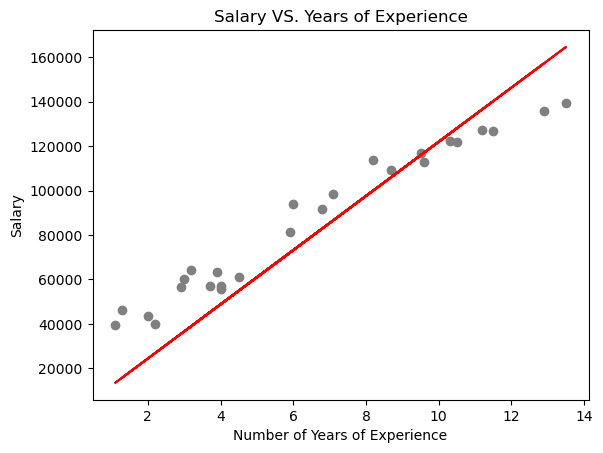

In [43]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regression_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary VS. Years of Experience')

MINI CHALLENGE
 - Use the trained model, obtain the salary corresponding to eployees who have years of experience = 5

In [44]:
num_years_exp = [[5]]

In [45]:
salary = regression_model_sklearn.predict(num_years_exp)
salary

array([[60978.95507812]])

### TASK #7: Train A Linear Learner Model Using SageMaker

In [46]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to writer software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [47]:
# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [48]:
# Let's define the S3 bucket and prefix that we want to use in this session
bucket = 'employee-salary-prediction-2' # bucket name
prefix = 'linear-learner' # prefix is the subfolder within the folder. To specify this region: US East (Ohio) us-east-2

# Specify the region
region = 'us-east-2'

In [49]:
# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
arn:aws:iam::756970149474:role/service-role/AmazonSageMaker-ExecutionRole-20231018T143251


In [50]:
X_train

array([[ 2. ],
       [11.2],
       [ 3. ],
       [13.5],
       [ 4. ],
       [ 8.2],
       [ 3.2],
       [12.9],
       [ 8.7],
       [10.5],
       [ 4. ],
       [ 2.2],
       [ 5.9],
       [ 4.5],
       [ 7.1],
       [ 9.6],
       [11.5],
       [ 1.3],
       [ 6.8],
       [ 6. ],
       [ 3.9],
       [ 2.9],
       [ 1.1],
       [ 3.7],
       [ 9.5],
       [10.3]], dtype=float32)

In [51]:
y_train = y_train[:,0]
y_train

array([ 43525., 127345.,  60150., 139465.,  56957., 113812.,  64445.,
       135675., 109431., 121872.,  55794.,  39891.,  81363.,  61111.,
        98273., 112635., 126756.,  46205.,  91738.,  93940.,  63218.,
        56642.,  39343.,  57189., 116969., 122391.], dtype=float32)

In [52]:
y_train.shape

(26,)

In [53]:
import io # The module allows for dealing with various typer of I/O (text I/O, binary I/O and raw I/O).
import numpy as np
import sagemaker.amazon.common as smac # Sagemaker common library

# Code below converts the data in numpy array format to RecordIO format
# This id the format required by Sagemaker Linear Learner
buf = io.BytesIO() # Create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0)
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero

0

In [54]:
import os

# Code to upload RecordIO data to S3

# Key refers to the name of the file
key = 'linear-train-data'

# The following code uploads the data in reacord-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in S3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://employee-salary-prediction-2/linear-learner/train/linear-train-data


In [55]:
X_test.shape

(9, 1)

In [56]:
y_test.shape

(9, 1)

In [57]:
# Make sure that the target label is a vector
y_test = y_test[:,0]

In [58]:
y_test

array([101302.,  57081.,  37731., 105582.,  54445.,  66029.,  67938.,
        83088., 128765.], dtype=float32)

In [59]:
# Code to upload RecordIO data to S3

buf = io.BytesIO() # Create an in-memory byte array (buf is a buffer I will be writting to)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
buf.seek(0)
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 

0

In [60]:
# Key refers to the name of the file
key = 'linear-test-data'

# The following code uploads the data in record-io format to S3 bucket to be accesed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# Let's print out the testing data location in S3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://employee-salary-prediction-2/linear-learner/test/linear-test-data


In [61]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://employee-salary-prediction-2/linear-learner/output


In [62]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker import image_uris

container = sagemaker.image_uris.retrieve("linear-learner", boto3.Session().region_name)

In [75]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training
# sagemaker_session = sagemaker.Session()

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)
                                       #use_spot_instances = True
                                       #max_run = 300,
                                       #train_max_weight = 600

In [76]:

# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 5,
                           num_models = 32,
                           loss = 'absolute_loss')

In [77]:
# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

INFO:sagemaker:Creating training-job with name: linear-learner-2023-10-19-18-32-02-160


2023-10-19 18:32:02 Starting - Starting the training job...
2023-10-19 18:32:19 Starting - Preparing the instances for training......
2023-10-19 18:33:31 Downloading - Downloading input data...
2023-10-19 18:34:01 Training - Downloading the training image.........
2023-10-19 18:35:27 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[10/19/2023 18:35:23 INFO 140362276591424] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1